In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
from scipy.signal import hilbert
import pickle
from matplotlib.ticker import MultipleLocator
from plot_styles import *
from MEMD_all import memd

In [2]:
with open("tq_2classes_Session4.pkl", "rb") as f:
    data = pickle.load(f)

print(type(data))

for key in data.keys():
    print(key)

marker_data = data['markers']

rest_marker = data["calibration_rest_mrks"]
print(rest_marker)

for num in marker_data:
    num = int(num) 
    #print(num)  

diffs = [b - a for a, b in zip(marker_data, marker_data[1:])]
abs_diffs = [abs(d)/250 for d in diffs] 
#print(abs_diffs)

classes = data['class']
print(classes)  

eeg_data = data['data']
print(type(eeg_data))
channels, samples = eeg_data.shape
print(f'Channels: {channels}, Samples: {samples}')

SAMPLING_FREQUENCY = 250  # Hz

channel_1 = eeg_data[0, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_2 = eeg_data[1, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_3 = eeg_data[2, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_4 = eeg_data[3, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_5 = eeg_data[4, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_6 = eeg_data[5, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_7 = eeg_data[6, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]
channel_8 = eeg_data[7, marker_data[20] - SAMPLING_FREQUENCY :  marker_data[20] + SAMPLING_FREQUENCY]

data = np.array([channel_1, channel_2, channel_3, channel_4, channel_5, channel_6, channel_7, channel_8])
print(type(data))
print(data.shape)

<class 'dict'>
data
markers
class
calibration_blink_mrks
calibration_rest_mrks
[3190, 4512]
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]
<class 'numpy.ndarray'>
Channels: 8, Samples: 88220
<class 'numpy.ndarray'>
(8, 500)


In [3]:
IMFs = memd(data,16)

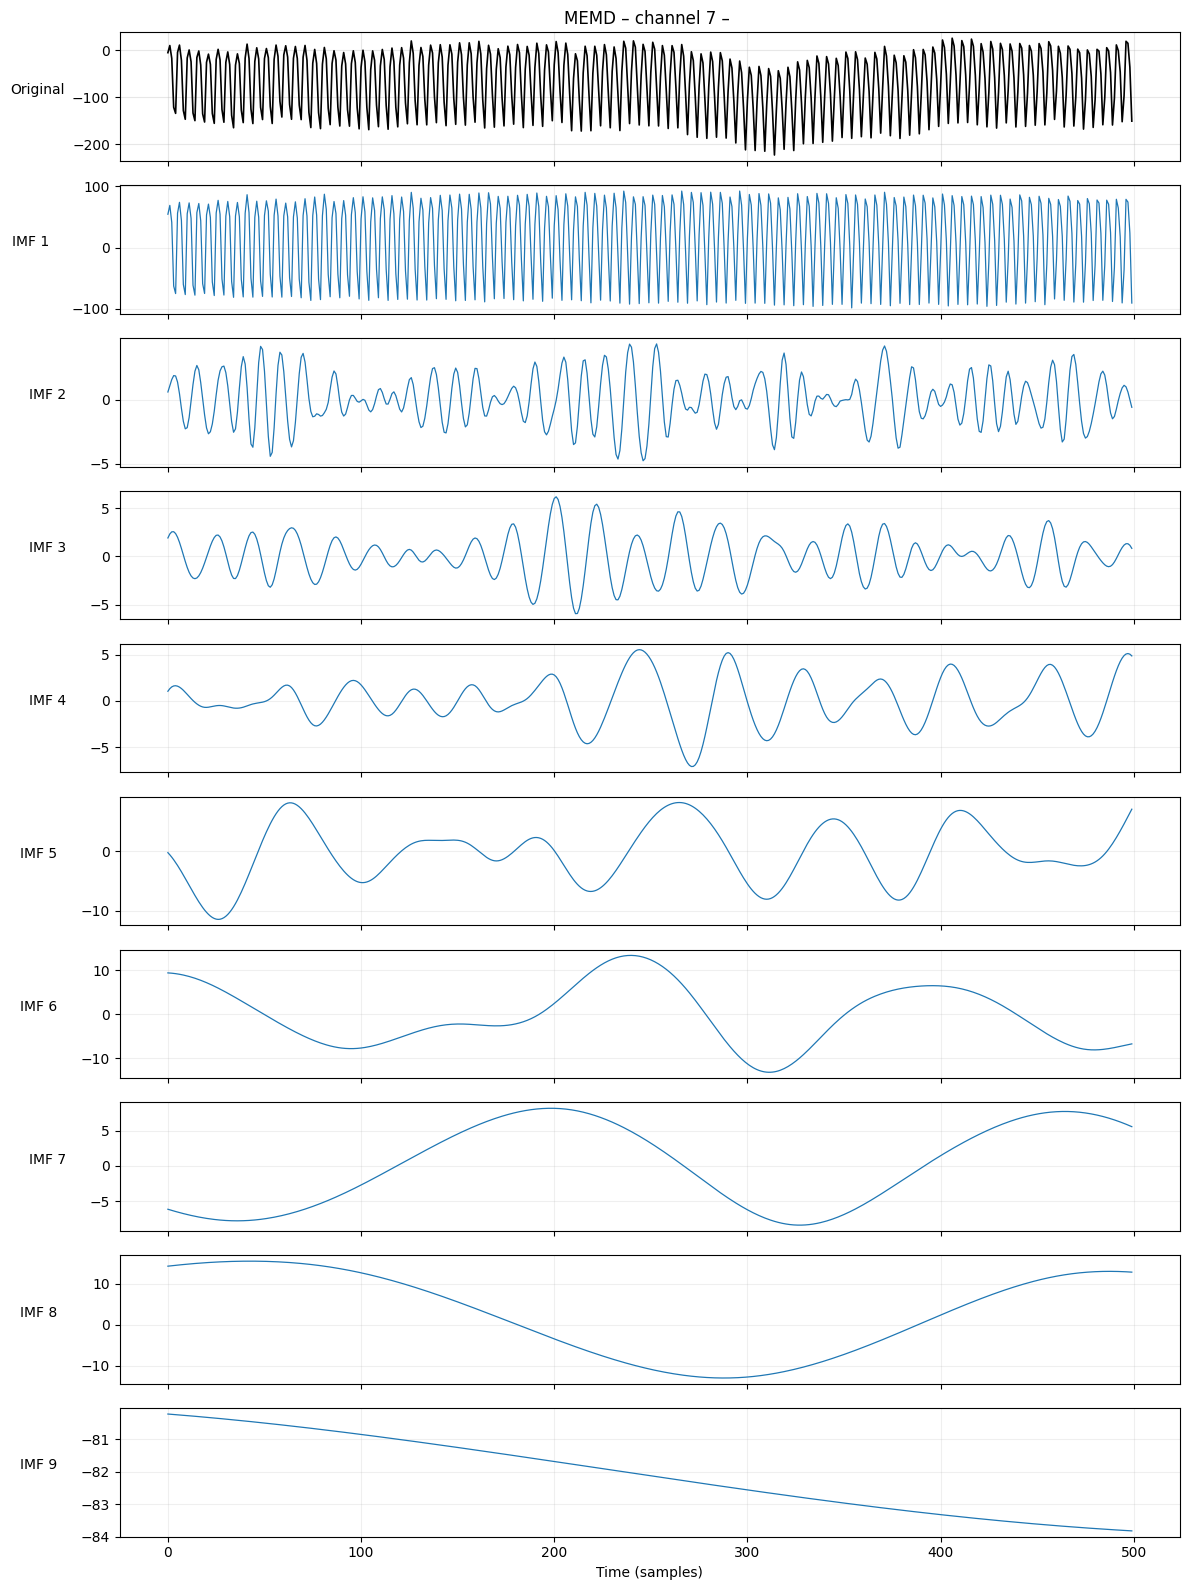

In [4]:
plot_imfs(data,IMFs, method_name="MEMD", roi_idx=6)

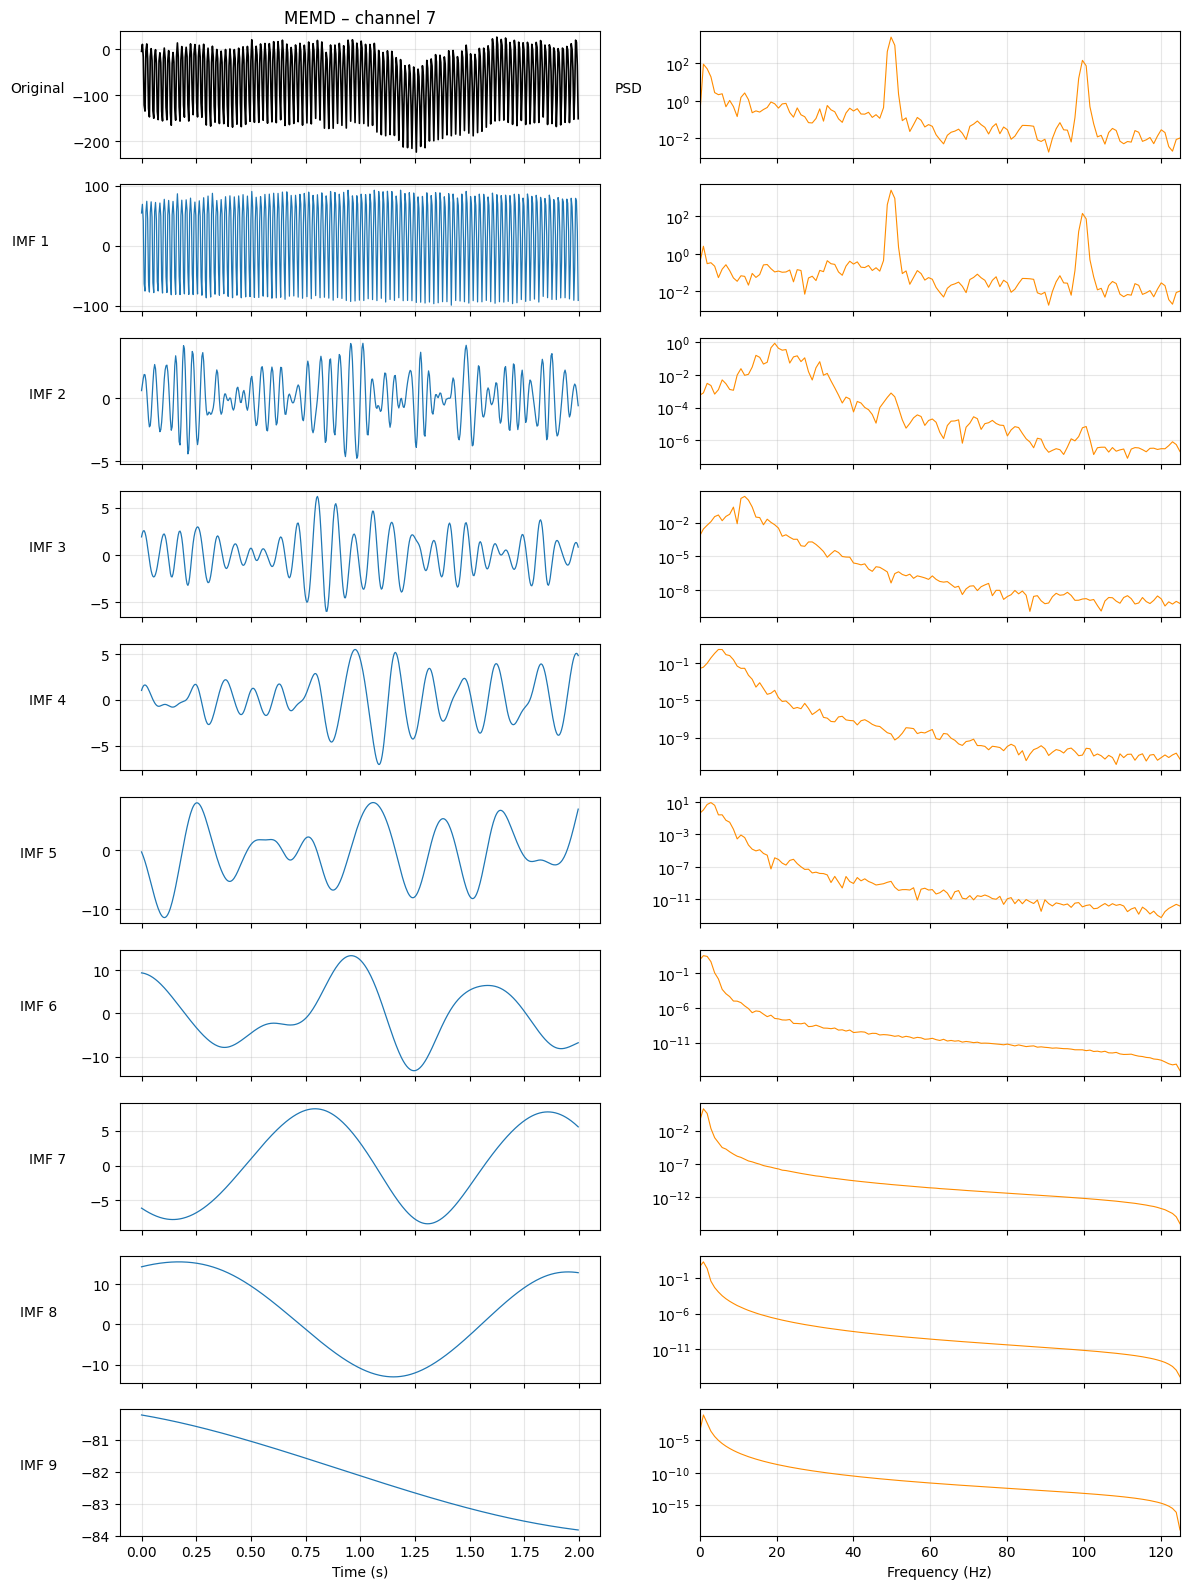

In [5]:
plot_imfs_with_spectrum(data,IMFs, method_name="MEMD", roi_idx=6, fs=SAMPLING_FREQUENCY, fmax=SAMPLING_FREQUENCY/2)

(9, 8, 500)
(9, 8, 500)


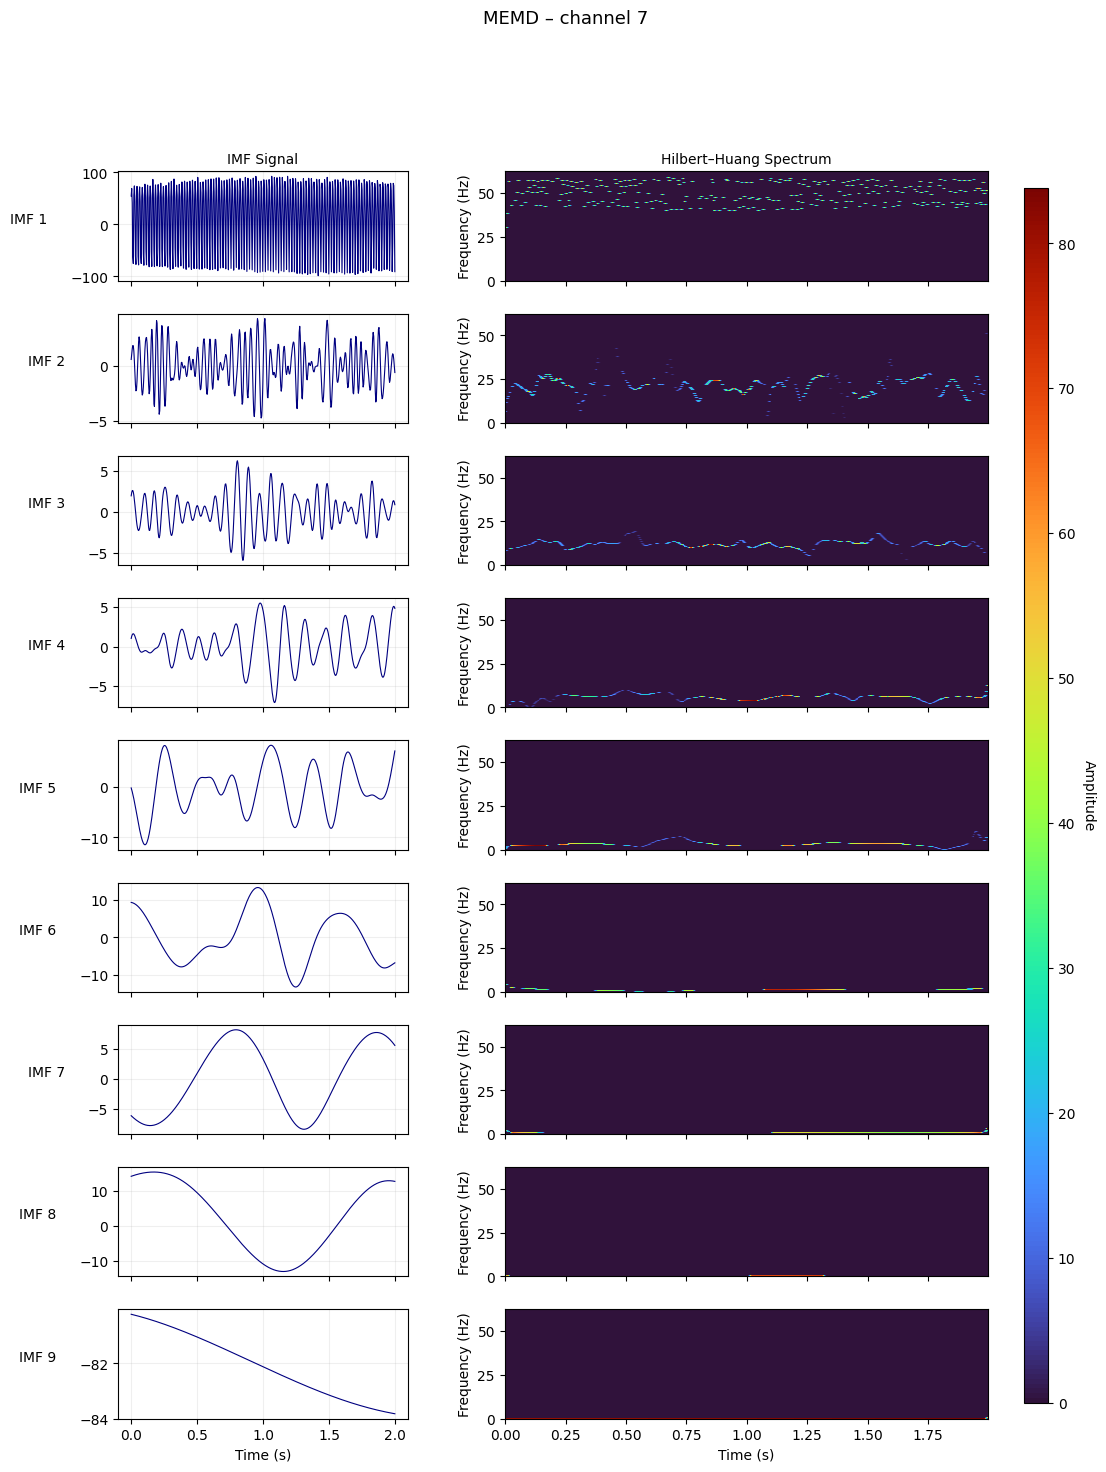

In [8]:
inst_amp, inst_freq = compute_hht(IMFs, fs=SAMPLING_FREQUENCY, smooth_sigma=1)

print(inst_amp.shape)
print(inst_freq.shape)

plot_imfs_with_hht(IMFs, inst_amp, inst_freq, method_name="MEMD", roi_idx=6, fs = SAMPLING_FREQUENCY, fmax=SAMPLING_FREQUENCY/4)

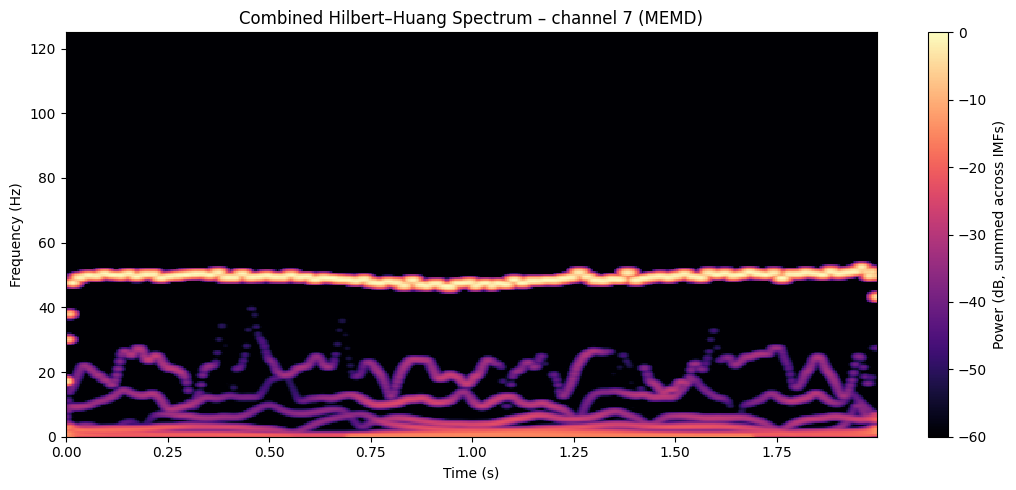

In [7]:
plot_combined_hht(inst_amp, inst_freq, method_name="MEMD", roi_idx=6, fs = SAMPLING_FREQUENCY, fmax=SAMPLING_FREQUENCY/2, imf_keep=(0,9))